## Lexy Feldmann<br>Professor Metzger<br>DSC680 Applied Data Science

### Load in Libraries and the Employee Dataset

#### Load libraries

In [52]:
# Insert the necessary libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import PolynomialFeatures

#### Load depression dataset

In [53]:
# Read in the employee dataset from Github and store in a dataframe variable called 'employee_dataset'
employee_dataset = pd.read_csv('https://raw.githubusercontent.com/lexyfeldmann/applieddatascience/refs/heads/main/HR_Analytics.csv')

# Print the first five rows of the table to ensure it loaded correctly
employee_dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### Exploratory Data Analysis

#### Looking at the attrition status column and how many termed vs. not

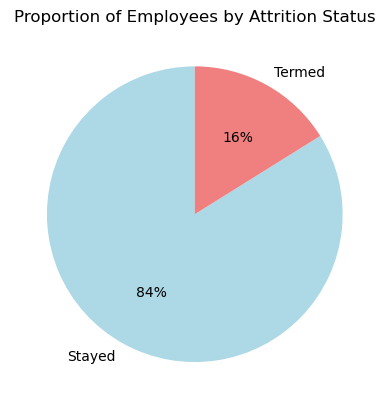

In [54]:
# Count the number of 0s and 1s in the Attrition column
attrition_counts = employee_dataset['Attrition'].value_counts().sort_index()

# Create the labels
labels = ['Stayed', 'Termed']

# Set the values to be the count of each group
values = attrition_counts.values

# Set pretty colors for each group
colors = ['lightblue', 'lightcoral']

# Plot the pie chart
plt.pie(values, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)

# Add a title to the chart
plt.title('Proportion of Employees by Attrition Status')

# Show the graph
plt.show()

#### Make the Attrition column have 1s & 0s

In [55]:
# Set values in Attrition column to be 1 or 0
employee_dataset['Attrition'] = employee_dataset['Attrition'].map({'Yes': 1, 'No': 0})

#### Looking at the EnvironmentSatisfaction column to see what proportion of each group is termed

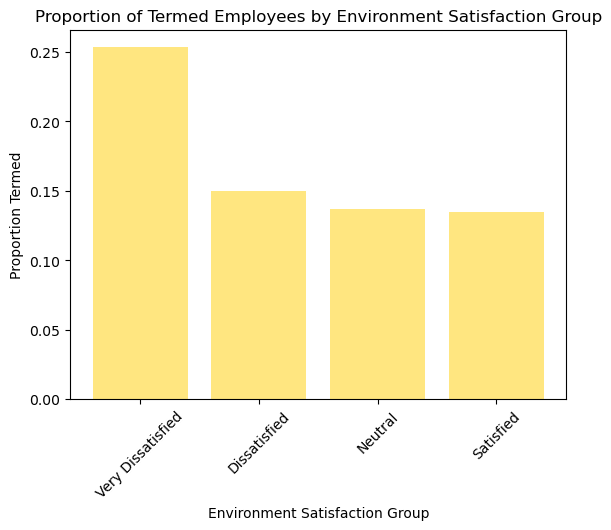

In [56]:
# Grab the mean for the Attrition column and group by the EnvironmentSatisfaction column to get the mean for every group size
attritionbyenvironment = employee_dataset.groupby('EnvironmentSatisfaction')['Attrition'].mean()

# Give values in EnvironmentSatisfaction column a text label, that way it makes more visual sense
satisfaction_labels = {
    1: 'Very Dissatisfied',
    2: 'Dissatisfied',
    3: 'Neutral',
    4: 'Satisfied',
    5: 'Very Satisfied'
}

# Set the labels to be the index of each attritionbyenvironment value and give it the descriptive labels
labels = attritionbyenvironment.index.map(satisfaction_labels)

# Set the values to be the mean of each attritionbyenvironment value
values = attritionbyenvironment.values

# Plot the data and add labels + yellow color
plt.bar(labels, values, color='#FFE680')

# Add a title
plt.title('Proportion of Termed Employees by Environment Satisfaction Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Environment Satisfaction Group')

# Rotate the x axis labels so they fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the JobSatisfaction column to see what proportion of each group has termed

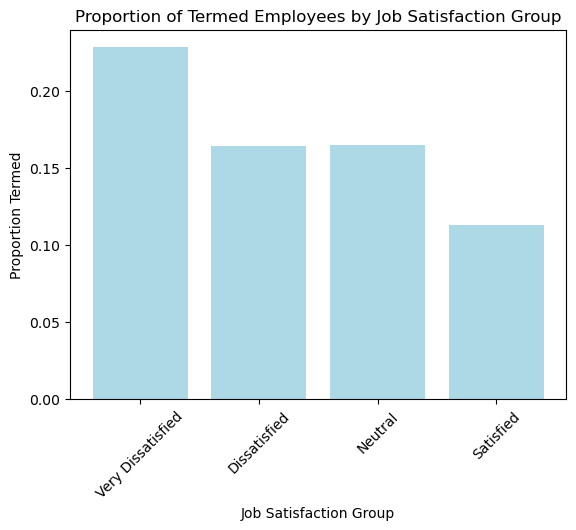

In [57]:
# Grab the mean for the Attrition column and group by the JobSatisfaction column to get the mean for every group size
attritionbyjob_satis = employee_dataset.groupby('JobSatisfaction')['Attrition'].mean()

# Set the labels to be the index of each attritionbyjob_satis value and give it the descriptive labels
labels = attritionbyjob_satis.index.map(satisfaction_labels)

# Set the values to be the mean of each attritionbyjob_satis value
values = attritionbyjob_satis.values

# Plot the data and add labels + blue color
plt.bar(labels, values, color='#ADD8E6')

# Add a title
plt.title('Proportion of Termed Employees by Job Satisfaction Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Job Satisfaction Group')

# Rotate the x axis labels so they fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the RelationshipSatisfaction column to see what proportion of each group has termed

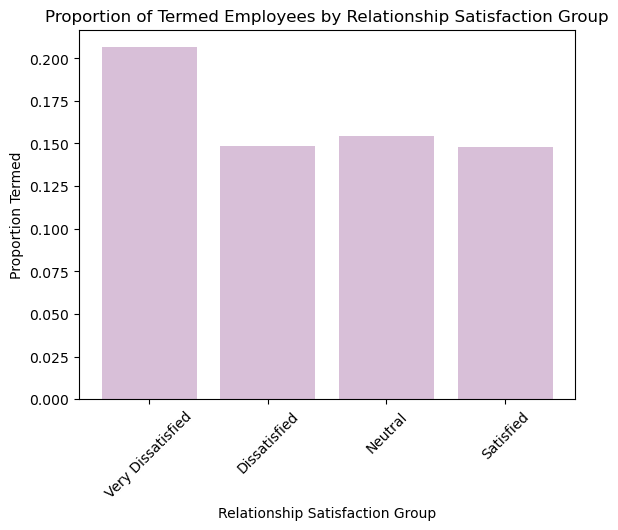

In [58]:
# Grab the mean for the Attrition column and group by the RelationshipSatisfaction column to get the mean for every group size
attritionbyrelationship_satis = employee_dataset.groupby('RelationshipSatisfaction')['Attrition'].mean()

# Set the labels to be the index of each attritionbyrelationship_satis value and give it the descriptive labels
labels = attritionbyrelationship_satis.index.map(satisfaction_labels)

# Set the values to be the mean of each attritionbyrelationship_satis value
values = attritionbyrelationship_satis.values

# Plot the data and add labels + purple color
plt.bar(labels, values, color='#D8BFD8')

# Add a title
plt.title('Proportion of Termed Employees by Relationship Satisfaction Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Relationship Satisfaction Group')

# Rotate the x axis labels so they fit properly
plt.xticks(rotation=45)

# Show the graph
plt.show()

#### Looking at the Overtime column to see what proportion of each group has termed

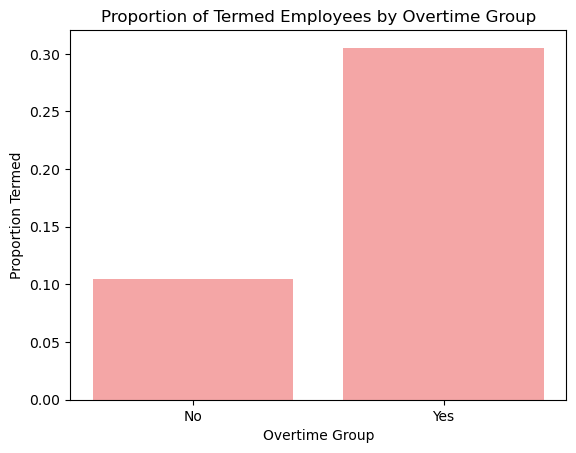

In [59]:
# Grab the mean for the Attrition column and group by the OverTime column to get the mean for every group size
attritionbyOT = employee_dataset.groupby('OverTime')['Attrition'].mean()

# Set the labels to be the index of each attritionbyOT value
labels = attritionbyOT.index

# Set the values to be the mean of each attritionbyOT value
values = attritionbyOT.values

# Plot the data and add labels + pink color
plt.bar(labels, values, color='#F4A6A6')

# Add a title
plt.title('Proportion of Termed Employees by Overtime Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Overtime Group')

# Show the graph
plt.show()

#### Looking at the WorkLifeBalance column to see what proportion of each group has termed

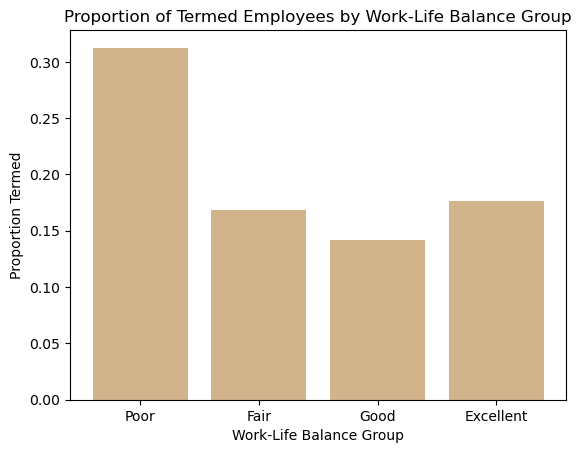

In [60]:
# Grab the mean for the Attrition column and group by the WorkLifeBalance column to get the mean for every group size
attritionbyWL = employee_dataset.groupby('WorkLifeBalance')['Attrition'].mean()

# Give values in WorkLifeBalance column a text label, that way it makes more visual sense
balance_labels = {
    1: 'Poor',
    2: 'Fair',
    3: 'Good',
    4: 'Excellent'
}

# Set the labels to be the index of each attritionbyWL value and give it the descriptive labels
labels = attritionbyWL.index.map(balance_labels)

# Set the values to be the mean of each attritionbyWL value
values = attritionbyWL.values

# Plot the data and add labels + brown color
plt.bar(labels, values, color='#D2B48C')

# Add a title
plt.title('Proportion of Termed Employees by Work-Life Balance Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Work-Life Balance Group')

# Show the graph
plt.show()

#### Looking at the BusinessTravel column to see what proportion of each group has termed

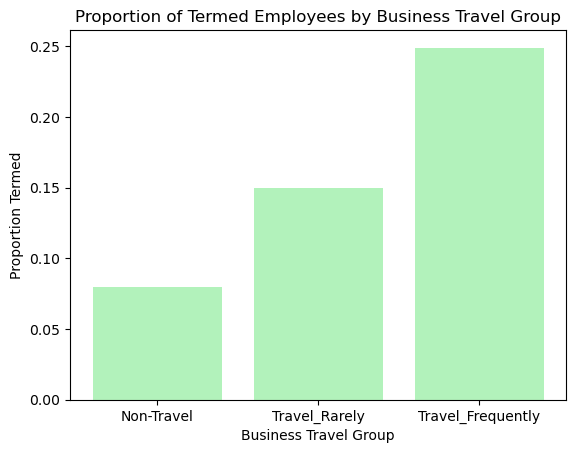

In [61]:
# Grab the mean for the Attrition column and group by the BusinessTravel column to get the mean for every group size
attritionbytravel = employee_dataset.groupby('BusinessTravel')['Attrition'].mean()

# Assign integers to each value in the BusinessTravel column (for sorting)
travel_order = {
    'Non-Travel': 1,
    'Travel_Rarely': 2,
    'Travel_Frequently': 3
}

# Set the labels to be the index of each attritionbytravel value and sort based on travel_order
labels = sorted(attritionbytravel.index, key = lambda x: travel_order[x])

# Set the values to be the mean of each attritionbytravel value and have them match the sorted labels
values = [attritionbytravel[label] for label in labels]

# Plot the data and add labels + green color
plt.bar(labels, values, color='#B2F2BB')

# Add a title
plt.title('Proportion of Termed Employees by Business Travel Group')

# Add x and y labels
plt.ylabel('Proportion Termed')
plt.xlabel('Business Travel Group')

# Show the graph
plt.show()

#### Create a boxplot to view the distribution of MonthlyIncome column and how it relates to Attrition

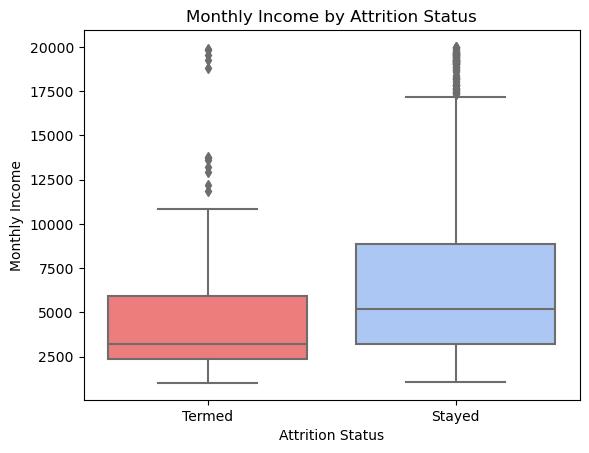

In [62]:
# Create an attritionlabel column for the dataset for visual appeal on the boxplot
employee_dataset['AttritionLabel'] = employee_dataset['Attrition'].map({1: 'Termed', 0: 'Stayed'})

# Create the boxplot with AttritionLabel on the x-axis and MonthlyIncome on the y-axis
sns.boxplot(x='AttritionLabel', y='MonthlyIncome', data=employee_dataset, palette=['#FF6B6B', '#A0C4FF'])

# Add a title
plt.title('Monthly Income by Attrition Status')

# Add x and y axis labels
plt.xlabel('Attrition Status')
plt.ylabel('Monthly Income')

# Show the graph
plt.show()

### Cleaning the Dataset for Modeling

#### Drop unnecessary features

In [63]:
# Drop unnecessary features from employee_dataset - AKA things we cannot discriminate against or control
employee_dataset = employee_dataset.drop(['Age', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
                                          'Gender', 'MaritalStatus', 'Over18', 'NumCompaniesWorked', 'StandardHours',
                                         'AttritionLabel', 'MonthlyRate', 'DailyRate', 'HourlyRate', 'PercentSalaryHike',
                                         'Performance Rating', 'TrainingTimesLastYear'],
                                         axis=1, errors='ignore')

# Print the dataframe to view the changes
employee_dataset.head()

,Attrition,BusinessTravel,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Travel_Rarely,Sales,1,2,3,2,Sales Executive,4,5993,Yes,3,1,0,8,1,6,4,0,5
1,0,Travel_Frequently,Research & Development,8,3,2,2,Research Scientist,2,5130,No,4,4,1,10,3,10,7,1,7
2,1,Travel_Rarely,Research & Development,2,4,2,1,Laboratory Technician,3,2090,Yes,3,2,0,7,3,0,0,0,0
3,0,Travel_Frequently,Research & Development,3,4,3,1,Research Scientist,3,2909,Yes,3,3,0,8,3,8,7,3,0
4,0,Travel_Rarely,Research & Development,2,1,3,1,Laboratory Technician,2,3468,No,3,4,1,6,3,2,2,2,2


#### Remove NaN values

In [64]:
# Remove any row from the dataset where there is a NaN value
employee_dataset = employee_dataset.dropna()

#### Binning numerical columns (to improve model performance)

In [65]:
# Bin MonthlyIncome into 6 fixed ranges
employee_dataset['IncomeGroup'] = pd.cut(employee_dataset['MonthlyIncome'], bins=[0, 4000, 8000, 12000, 16000, 20000], labels=['Very Low Income', 'Low Income', 'Average Income', 'High Income', 'Very High Income'])

# Bin YearsAtCompany into 6 fixed ranges
employee_dataset['TenureGroup'] = pd.cut(employee_dataset['YearsAtCompany'], bins=[0, 5, 10, 15, 20, 30, float('inf')], labels=['0-5 Years', '5-10 Years', '10-15 Years', '15-20 Years', '20-30 Years', '30+ Years'])

# Bin TotalWorkingYears into 6 fixed ranges
employee_dataset['WorkingYearsGroup'] = pd.cut(employee_dataset['TotalWorkingYears'], bins=[0, 5, 10, 15, 20, 30, float('inf')], labels=['0-5 Years', '5-10 Years', '10-15 Years', '15-20 Years', '20-30 Years', '30+ Years'])

# Bin YearsInCurrentRole into 6 fixed ranges
employee_dataset['YearsInCurrentRoleGroup'] = pd.cut(employee_dataset['YearsInCurrentRole'], bins=[0, 3, 6, 9, 12, 15, float('inf')], labels=['0-3 Years', '3-6 Years', '6-9 Years', '9-12 Years', '12-15 Years', '15+ Years'])

# Bin YearsSinceLastPromotion into 6 fixed ranges
employee_dataset['YearsSinceLastPromotionGroup'] = pd.cut(employee_dataset['YearsSinceLastPromotion'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2 Years', '2-4 Years', '4-6 Years', '6-8 Years', '8-10 Years', '10+ Years'])

# Bin YearsWithCurrManager into 6 fixed ranges
employee_dataset['YearsWithCurrManagerGroup'] = pd.cut(employee_dataset['YearsWithCurrManager'], bins=[0, 2, 4, 6, 8, 10, float('inf')], labels=['0-2 Years', '2-4 Years', '4-6 Years', '6-8 Years', '8-10 Years', '10+ Years'])

In [66]:
# Drop the old columns
employee_dataset = employee_dataset.drop(['Monthly Income', 'YearsAtCompany', 'TotalWorkingYears', 'YearsInCurrentRole',
                                         'YearsSinceLastPromotion', 'YearsWithCurrManager'],
                                         axis=1, errors='ignore')

#### Make specific columns categorical

In [67]:
# Make the column EnvironmentSatisfaction a categorical column by making it type string
employee_dataset['EnvironmentSatisfaction'] = employee_dataset['EnvironmentSatisfaction'].astype(str)

# Make the column JobInvolvemente a categorical column by making it type string
employee_dataset['JobInvolvement'] = employee_dataset['JobInvolvement'].astype(str)

# Make the column JobLevel a categorical column by making it type string
employee_dataset['JobLevel'] = employee_dataset['JobLevel'].astype(str)

# Make the column PerformanceRating a categorical column by making it type string
employee_dataset['PerformanceRating'] = employee_dataset['PerformanceRating'].astype(str)

# Make the column RelationshipSatisfaction a categorical column by making it type string
employee_dataset['RelationshipSatisfaction'] = employee_dataset['RelationshipSatisfaction'].astype(str)

# Make the column StockOptionLevel a categorical column by making it type string
employee_dataset['StockOptionLevel'] = employee_dataset['StockOptionLevel'].astype(str)

# Make the column JobSatisfaction a categorical column by making it type string
employee_dataset['JobSatisfaction'] = employee_dataset['JobSatisfaction'].astype(str)

# Make the column WorkLifeBalance a categorical column by making it type string
employee_dataset['WorkLifeBalance'] = employee_dataset['WorkLifeBalance'].astype(str)

#### Create dummy variables for categorical columns

In [68]:
# Create dummy variables for BusinessTravel
employee_dataset = pd.get_dummies(employee_dataset, columns=['BusinessTravel'], drop_first=True)

# Create dummy variables for Department
employee_dataset = pd.get_dummies(employee_dataset, columns=['Department'], drop_first=True)

# Create dummy variables for EnvironmentSatisfaction
employee_dataset = pd.get_dummies(employee_dataset, columns=['EnvironmentSatisfaction'], drop_first=True)

# Create dummy variables for JobInvolvement
employee_dataset = pd.get_dummies(employee_dataset, columns=['JobInvolvement'], drop_first=True)

# Create dummy variables for JobRole
employee_dataset = pd.get_dummies(employee_dataset, columns=['JobRole'], drop_first=True)

# Create dummy variables for JobLevel
employee_dataset = pd.get_dummies(employee_dataset, columns=['JobLevel'], drop_first=True)

# Create dummy variables for JobSatisfaction
employee_dataset = pd.get_dummies(employee_dataset, columns=['JobSatisfaction'], drop_first=True)

# Create dummy variables for OverTime
employee_dataset = pd.get_dummies(employee_dataset, columns=['OverTime'], drop_first=True)

# Create dummy variables for PerformanceRating
employee_dataset = pd.get_dummies(employee_dataset, columns=['PerformanceRating'], drop_first=True)

# Create dummy variables for RelationshipSatisfaction
employee_dataset = pd.get_dummies(employee_dataset, columns=['RelationshipSatisfaction'], drop_first=True)

# Create dummy variables for StockOptionLevel
employee_dataset = pd.get_dummies(employee_dataset, columns=['StockOptionLevel'], drop_first=True)

# Create dummy variables for WorkLifeBalance
employee_dataset = pd.get_dummies(employee_dataset, columns=['WorkLifeBalance'], drop_first=True)

# Create dummy variables for IncomeGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['IncomeGroup'], drop_first=True)

# Create dummy variables for TenureGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['TenureGroup'], drop_first=True)

# Create dummy variables for WorkingYearsGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['WorkingYearsGroup'], drop_first=True)

# Create dummy variables for YearsInCurrentRoleGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['YearsInCurrentRoleGroup'], drop_first=True)

# Create dummy variables for YearsSinceLastPromotionGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['YearsSinceLastPromotionGroup'], drop_first=True)

# Create dummy variables for YearsWithCurrManagerGroup
employee_dataset = pd.get_dummies(employee_dataset, columns=['YearsWithCurrManagerGroup'], drop_first=True)

In [69]:
# Print the first five rows to view those changes
employee_dataset.head()

,Attrition,DistanceFromHome,MonthlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,...,YearsSinceLastPromotionGroup_2-4 Years,YearsSinceLastPromotionGroup_4-6 Years,YearsSinceLastPromotionGroup_6-8 Years,YearsSinceLastPromotionGroup_8-10 Years,YearsSinceLastPromotionGroup_10+ Years,YearsWithCurrManagerGroup_2-4 Years,YearsWithCurrManagerGroup_4-6 Years,YearsWithCurrManagerGroup_6-8 Years,YearsWithCurrManagerGroup_8-10 Years,YearsWithCurrManagerGroup_10+ Years
0,1,1,5993,False,True,False,True,True,False,False,...,False,False,False,False,False,False,True,False,False,False
1,0,8,5130,True,False,True,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,1,2,2090,False,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0,3,2909,True,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
4,0,2,3468,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Get Training and Test Data Ready for Modeling

#### Split data into training and test data

In [70]:
# Grab the features of the data, which are all columns except for Attrition
features = employee_dataset.drop('Attrition', axis=1)

# Grab the target column (Attrition) of the data
target = employee_dataset['Attrition']

# Split the data into 70% training and 30% testing
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

### Begin Training a Logistic Regression Model

#### Logistic Regression Model

In [71]:
# Create pipeline object with StandardScaler (to make sure features are standardizes) and LogisticRegression with
# class_weight = balanced to account for the imbalance of the Attrition column
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(class_weight='balanced')
)

# Train the model using the training data and store into logistic_regression variable
logistic_regression = pipeline.fit(features_train, target_train)

#### Grabbing model accuracy

In [72]:
# Evaluate the model's accuracy using the test data and store in accuracy variable
accuracy = logistic_regression.score(features_test, target_test)

# Print the accuracy score of the model
print("Model accuracy:", accuracy)

Model accuracy: 0.7913832199546486


#### Classification Report based on the predictions of the model

In [73]:
# Predict the labels for the test set
predictions = logistic_regression.predict(features_test)

# Create the classification report and store it in 'report' variable
report = classification_report(target_test, predictions)

# Print the classification report to see how well the model performed
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       380
           1       0.38      0.77      0.51        61

    accuracy                           0.79       441
   macro avg       0.67      0.78      0.69       441
weighted avg       0.88      0.79      0.82       441



#### Create a confusion matrix

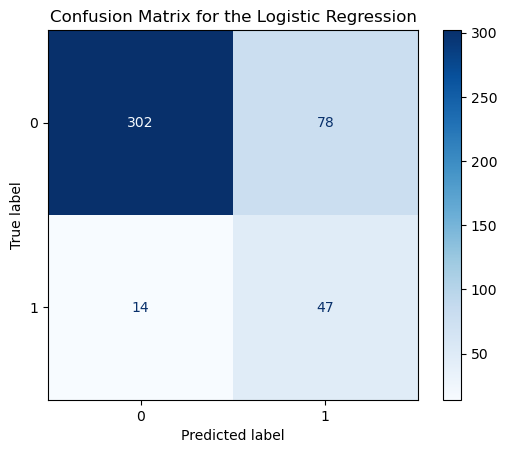

In [74]:
# Create a confusion matrix for the predictions
conf_mat = confusion_matrix(target_test, predictions)

# Plot the confusion matrix
pretty_matrix = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

# Display the plot with blue colors
pretty_matrix.plot(cmap='Blues')

# Add a title to the plot
plt.title('Confusion Matrix for the Logistic Regression')

# Show the matrix
plt.show()

#### Create a table to view the coefficients of the features

In [75]:
# Grab the logistic regression model from the pipeline
logreg_model = logistic_regression.named_steps['logisticregression']

# Get the coefficients and feature names and store in coefficients variable
coefficients = logreg_model.coef_[0]

# Get the names of the features and store in feature_names
feature_names = features_train.columns

# Create a DataFrame to display the coefficient values along with which feature it is (the feature name)
coefficient_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Print the first 5 rows of the dataframe to confirm it worked
coefficient_df.head()

,Feature,Coefficient
0,DistanceFromHome,0.358524
1,MonthlyIncome,-0.330657
2,BusinessTravel_Travel_Frequently,0.618588
3,BusinessTravel_Travel_Rarely,0.398063
4,Department_Research & Development,0.493619


#### Graph the features and their coefficients

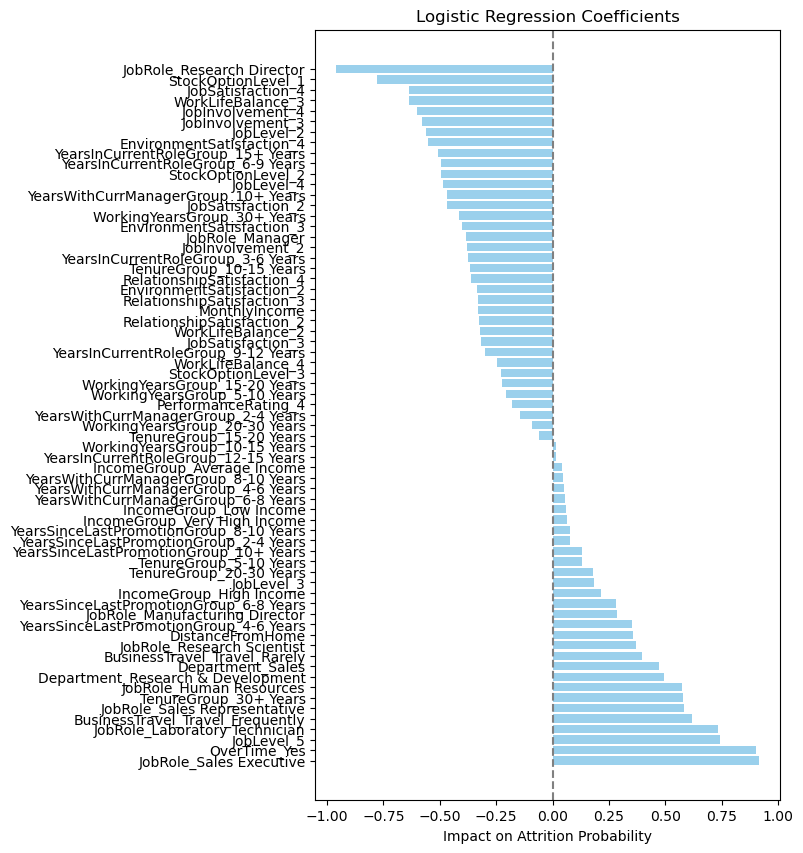

In [76]:
# Sort the coefficient_df in descending order to prepare for visualizing
coefficient_df = coefficient_df.sort_values('Coefficient', ascending=False)

# Set a larger plot size
plt.figure(figsize=(6, 10))

# Create bar visual where the x axis is the coefficient value and the y axis are the features, set color to blue
plt.barh(coefficient_df['Feature'], coefficient_df['Coefficient'], color='#9AD0EC')

# Set the vertical line for the x axis at 0, color to gray, and the line to be dashed. This will make it easier to see which
# features have a positive or negative coefficient
plt.axvline(x=0, color='gray', linestyle='--')

# Add a title to the graph
plt.title('Logistic Regression Coefficients')

# Add an x axis label
plt.xlabel('Impact on Attrition Probability')

# Show the graph
plt.show()

### Evaluating Interactions Between Features

#### Generate interactions

In [77]:
# Generate interactions only with 2-way interactions (column pairs)
polyfeat = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Create all interactions from my features and create a new matrix with all columns
interactions = polyfeat.fit_transform(features)

# Grab names of new columns to know which were combined
interaction_names = polyfeat.get_feature_names_out(features.columns)

# Add these interactions and their names to a new dataframe called interactions_df
interactions_df = pd.DataFrame(interactions, columns=interaction_names)

In [78]:
# Print the dataframe to view
interactions_df.head()

,DistanceFromHome,MonthlyIncome,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_2,...,YearsWithCurrManagerGroup_2-4 Years YearsWithCurrManagerGroup_4-6 Years,YearsWithCurrManagerGroup_2-4 Years YearsWithCurrManagerGroup_6-8 Years,YearsWithCurrManagerGroup_2-4 Years YearsWithCurrManagerGroup_8-10 Years,YearsWithCurrManagerGroup_2-4 Years YearsWithCurrManagerGroup_10+ Years,YearsWithCurrManagerGroup_4-6 Years YearsWithCurrManagerGroup_6-8 Years,YearsWithCurrManagerGroup_4-6 Years YearsWithCurrManagerGroup_8-10 Years,YearsWithCurrManagerGroup_4-6 Years YearsWithCurrManagerGroup_10+ Years,YearsWithCurrManagerGroup_6-8 Years YearsWithCurrManagerGroup_8-10 Years,YearsWithCurrManagerGroup_6-8 Years YearsWithCurrManagerGroup_10+ Years,YearsWithCurrManagerGroup_8-10 Years YearsWithCurrManagerGroup_10+ Years
0,1.0,5993.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,8.0,5130.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,2090.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,2909.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,3468.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Identifying interaction columns and adding Attrition column to DataFrame

In [79]:
# Add the Attrition column to the interactions_df
interactions_df['Attrition'] = employee_dataset['Attrition'].values

# Create an empty list to hold the interaction columns
interaction_columns = []

# Loop through the columns and find the ones that are the interaction columns, they should have two underscores in their
# name. Then add them to the interaction_columns array
for col in interactions_df.columns:
    if col.count('_') == 2:
        interaction_columns.append(col)

#### Calculating the mean attrition rate for each interaction

In [80]:
# Create a new list called interactions_subset
interactions_subset = []

# For each interaction feature, only look at where interactions occured and add that column to a subset
for col in interaction_columns:
    subset = interactions_df[interactions_df[col] == 1]
    # Loop through the subset, and calculate how many termed
    if not subset.empty:
        mean_attrition = subset['Attrition'].mean()
        # Count how many employees had this interaction
        n = subset.shape[0]
        # Create new dictionary to hold all the new data
        entry = {}
        # Add the interaction, mean attrition, and N columns (with their values), and append this to interactions_subset
        entry['Interaction'] = col
        entry['Mean_Attrition'] = mean_attrition
        entry['N'] = n
        interactions_subset.append(entry)

#### Create dataframe of results, then sort by Mean_Depression and filter by N size

In [81]:
# Convert the results list to a dataframe
interactions = pd.DataFrame(interactions_subset)

# Sort the dataframe by the Mean_Attrition column in descending order
interactions = interactions.sort_values(by='Mean_Attrition', ascending=False)

#### Look at high and low Mean_Depression for these interactions

In [84]:
# Grab the rows in the dataset where Mean_Attrition is greater than or equal to 0.3 and N is greater than or equal to 20,
# and store in high_mean df
high_mean = interactions[(interactions['Mean_Attrition'] >= 0.3) & (interactions['N'] >= 20)]

# Show the first 15 rows of those with a high_mean
high_mean.head(50)

,Interaction,Mean_Attrition,N
749,JobRole_Sales Representative OverTime_Yes,0.666667,24
494,JobRole_Laboratory Technician OverTime_Yes,0.500000,62
298,JobInvolvement_2 JobRole_Sales Representative,0.500000,20
752,JobRole_Sales Representative RelationshipSatis...,0.478261,23
746,JobRole_Sales Representative JobSatisfaction_2,0.476190,21
1084,OverTime_Yes YearsSinceLastPromotionGroup_6-8 ...,0.423077,26
128,EnvironmentSatisfaction_2 JobRole_Sales Repres...,0.409091,22
243,EnvironmentSatisfaction_4 JobRole_Sales Repres...,0.409091,22
70,Department_Sales JobRole_Sales Representative,0.397590,83
753,JobRole_Sales Representative RelationshipSatis...,0.391304,23


In [85]:
# Grab the rows in the dataset where Mean_Attrition is less than or equal to 0.1  and N is greater than or equal to 20,
# and store in low_mean df
low_mean = interactions[(interactions['Mean_Attrition'] <= 0.1) & (interactions['N'] >= 20)]

# Sort in ascending order to get the lowest values at the top
low_mean = low_mean.sort_values(by='Mean_Attrition', ascending=True)

# Show the first 50 rows of those with a low_mean
low_mean.head(50)

,Interaction,Mean_Attrition,N
258,EnvironmentSatisfaction_4 StockOptionLevel_3,0.0,22
1266,StockOptionLevel_1 YearsWithCurrManagerGroup_1...,0.0,36
1245,StockOptionLevel_1 TenureGroup_20-30 Years,0.0,24
1240,StockOptionLevel_1 IncomeGroup_High Income,0.0,29
622,JobRole_Research Director JobSatisfaction_4,0.0,22
799,JobLevel_2 YearsInCurrentRoleGroup_9-12 Years,0.0,22
871,JobLevel_4 TenureGroup_5-10 Years,0.0,20
870,JobLevel_4 IncomeGroup_Very High Income,0.0,57
853,JobLevel_3 YearsWithCurrManagerGroup_10+ Years,0.0,21
862,JobLevel_4 StockOptionLevel_1,0.0,49
